In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import IPython.display as Disp
import numpy as np
from PIL import Image

In [2]:
river = np.array(([146,8],
                   [147,3],
                   [155,18],
                   [158,32],
                   [166,57],
                   [170,66],
                   [169,54],
                   [173,63],
                   [172,85],
                   [175,110],
                   [171,102],
                   [175,121],
                   [172,108],
                   [168,130],
                   [170,142],
                   [167,155],
                   [165,171],
                   [170,184],
                   [161,184],
                   [160,196],
                   [171,191],
                   [165,203],
                   [176,202],
                   [167,213],
                   [178,217],
                   [172,224],
                   [178,228],
                   [174,246],
                   [189,260],
                   [194,262],
                   [195,253],
                   [190,265],
                   [199,278],
                   [206,273],
                   [202,274],
                   [201,270],
                   [203,295],
                   [216,289],
                   [212,301],
                   [215,299],
                   [217,327],
                   [211,334],
                   [168,68],
                   [169,68],
                   [176,88],
                   [177,100],
                   [168,136],
                   [177,154],
                   [162,198],
                   [161,196]))


In [3]:
nrx = [32,52,348,485,231,123,343,234,435,372,325,141,263,248,72,237,283,492,
            132,86,116,224,298,479,238,259,431,461,411,277,388,206,469,392,129,371,
            108,426,111,424,415,426,101,124,398,45,476,78,268,335,372,124,304,58,
            357,338,270,440,310,281,428,222,468,417,332,321,469,443,410,410,441,68,
            235,460,463,375,68,454,314,316,274,101,114,362,390,257,324,292,474,455,
            468,455,473,230,413,360,55,313,418,488]

nry = [436,252,476,307,93,116,490,468,400,452,307,309,35,301,450,148,41,450,
            295,452,312,211,36,430,56,51,446,490,29,480,99,55,408,91,126,175,
            401,483,142,410,189,302,268,112,121,432,221,260,348,412,159,406,220,446,
            307,476,144,416,96,246,24,185,90,235,252,440,52,116,388,104,62,128,
            161,480,422,287,130,318,143,357,93,440,279,303,58,224,347,74,35,452,
            56,458,463,60,306,334,145,470,40,184]

non_river1=list(zip(nrx, nry))
non_river=np.array(non_river1)
non_river.shape

(100, 2)

In [4]:
im1 = np.array(Image.open('band1.gif', 'r'))
im2 = np.array(Image.open('band2.gif', 'r'))
im3 = np.array(Image.open('band3.gif', 'r'))
im4 = np.array(Image.open('band4.gif', 'r'))

In [5]:
rb1=[]
rb2=[]
rb3=[]
rb4=[]
for i in range(50):
    rb1.append(im1[river[i][1],river[i][0]])
    rb2.append(im2[river[i][1],river[i][0]])
    rb3.append(im3[river[i][1],river[i][0]])
    rb4.append(im4[river[i][1],river[i][0]])

In [6]:
nrb1=[]
nrb2=[]
nrb3=[]
nrb4=[]
for i in range(100):
    nrb1.append(im1[nrx[i],nry[i]])
    nrb2.append(im2[nrx[i],nry[i]])
    nrb3.append(im3[nrx[i],nry[i]])
    nrb4.append(im4[nrx[i],nry[i]])

In [7]:
river_train_set = np.array(np.transpose([rb1,rb2,rb3,rb4]))
non_river_train_set = np.array(np.transpose([nrb1,nrb2,nrb3,nrb4]))
river_train_set.shape

(50, 4)

In [8]:
T1 = river_train_set.mean(0)
T2 = non_river_train_set.mean(0)
print("Mean of River class")
print(T1)
print()
print("Mean of Non-river class")
print(T2)

Mean of River class
[11.9  13.98 17.32  8.42]

Mean of Non-river class
[ 7.92  8.92 11.09 17.55]


In [9]:
test_data=np.array([im1,im2,im3,im4])
test_data.shape

(4, 512, 512)

In [10]:
def cov(d):
    m = d.mean(0)
    row,col=d.shape
    covm = np.zeros((col,col))
    v = np.zeros(col)        
    for j in range(col):
        for k in range(col):
            for i in range(row):
                covm[j][k] += (1/row) * (d[i][j] - m[j]) * (d[i][k] - m[k])                    
    return covm

covm_river = cov(river_train_set)
print("Covariance matrix of River class\n")
print(covm_river)
print()
covm_nr = cov(non_river_train_set)
print("Covariance matrix of Non-river class\n")
print(covm_nr)

Covariance matrix of River class

[[ 0.65    0.318   0.372   0.202 ]
 [ 0.318   0.6596  0.6864 -1.0316]
 [ 0.372   0.6864  1.4976 -2.0744]
 [ 0.202  -1.0316 -2.0744 15.4436]]

Covariance matrix of Non-river class

[[ 7.2736  6.4036 10.5972  7.184 ]
 [ 6.4036  6.6936 10.0072  8.134 ]
 [10.5972 10.0072 18.5619 11.9005]
 [ 7.184   8.134  11.9005 51.8275]]


In [11]:
def posterior(i,j):
    r = np.subtract(test_data[:,i,j],T1)
    nr = np.subtract(test_data[:,i,j],T2)

    river_class= np.dot(np.dot(r.T,np.linalg.inv(covm_river)), r)
    non_river_class = np.dot(np.dot(nr.T,np.linalg.inv(covm_nr)), nr)

    det_r = np.linalg.det(covm_river)
    p1 = (-0.5) * 1/np.sqrt(det_r) * np.exp(river_class);

    det_nr = np.linalg.det(covm_nr)
    p2 = (-0.5) * 1/np.sqrt(det_nr) * np.exp(non_river_class);
    return p1,p2


In [12]:
def bayes(P1, P2):
    op_image=np.zeros((512,512))
    for i in range(512):
        for j in range(512):
            p1,p2 = posterior(i,j)
            if((P1 * p1) >= (P2 * p2)):
                op_image[i,j]=255
            else:
                op_image[i,j]=0
                
    return op_image

In [13]:
sample = plt.imread('pqr.jpg')

c:\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


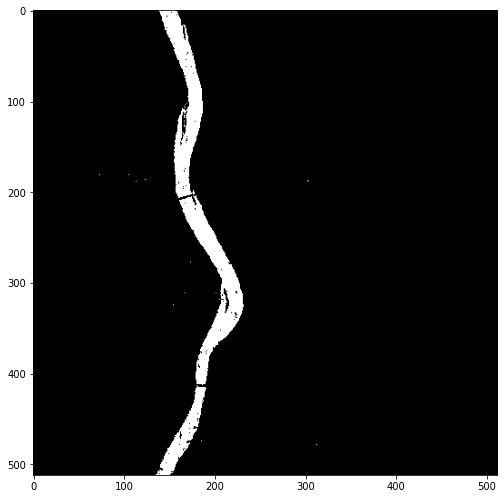

Accuracy :  99.80888366699219 %


In [14]:
image1 = bayes(P1=0.3,P2=0.7)

plt.imshow(image1, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()


count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>127:
            val=255
        else:
            val=0
        if (val==image1[i,j]):
            count = count+1
print('Accuracy : ',count*100/(512*512),'%')

c:\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


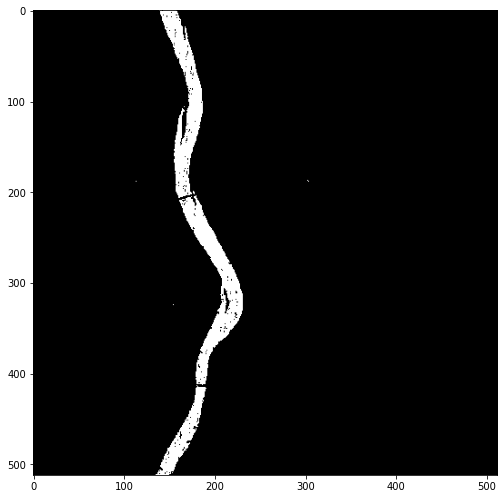

Accuracy :  99.74174499511719 %


In [15]:
image2 = bayes(P1=0.7,P2=0.3)

plt.imshow(image2, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()

count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>150:
            val=255
        else:
            val=0
        if (val==image2[i,j]):
            count = count+1
print('Accuracy : ',count*100/(512*512),'%')

c:\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


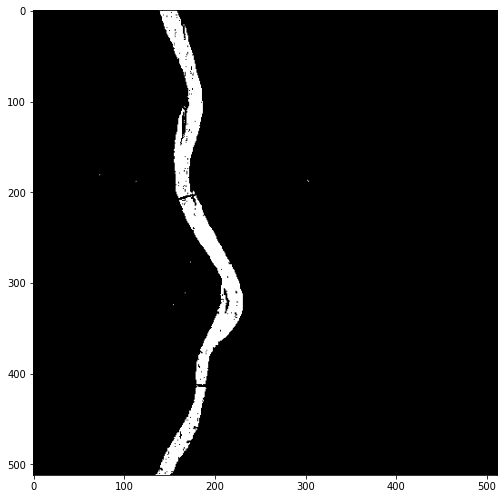

Accuracy :  99.7711181640625 %


In [16]:
image3 = bayes(P1=0.5,P2=0.5)
plt.imshow(image3, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()

count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>100:
            val=255
        else:
            val=0
        if (val==image3[i,j]):
            count = count+1
print('Accuracy : ',count*100/(512*512),'%')